In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# The dataset given below is supervised learning, where a input data is provided to the model along with the output. The goal of supervised learning is to train the model so that it can predict the output when it is given new data.

In [2]:
data=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data=data[data[('host_name')].map(data['host_name'].value_counts())>100]
data=data[data[('neighbourhood')].map(data['neighbourhood'].value_counts())>100]

# We use Power Transformer to reduce the mean square error as much as possible and eventually any distribution of the price will be however transformed into standard normal distribution.Here we are transforming only for the price.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

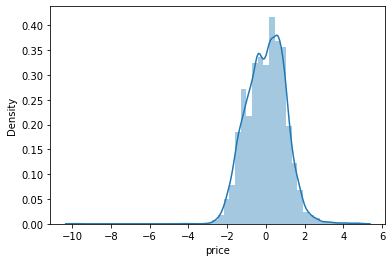

In [5]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
p=PowerTransformer()
data['price']=p.fit_transform(data[['price']])
sns.distplot(data.price)

In [6]:
#from sklearn.preprocessing import FunctionTransformer
#f=FunctionTransformer(np.log1p)
#data['price']=f.fit_transform(data[['price']])
#sns.distplot(data.price)

# Standard Scaler works similar like Power Transformer, the only change in the Standard Scaler is that the distribution remains the same and the values get scaled-up.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

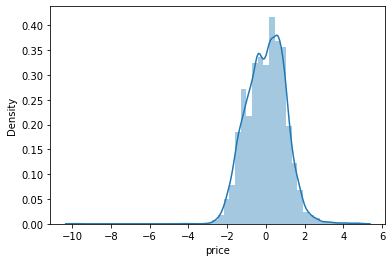

In [7]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data['price']=s.fit_transform(data[['price']])
sns.distplot(data.price)

In [8]:
data.name=data.name.fillna('0')
data.host_name=data.host_name.fillna('0')
data.price=data.price.fillna(0)
data.last_review=data.last_review.fillna(0)
data.reviews_per_month=data.reviews_per_month.fillna(0)

# Step 1:¶
# The first step is to find the null values given in the data.

In [9]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Step 2:
# Since there are null values in the given data, we proceed to we replace it with 0 or any other number or variable satisfying the given data before starting step 1. For example data.x=data.x.fillna(0), where x is an imaginary column.

In [10]:
data.shape

(6329, 16)

# Step 3:
# We drop some certain columns to predict the prices of airbnb.

In [11]:
x=data.drop(columns=['last_review','price','name'])
x

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0
5,5099,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,0.59,1,129
32,9782,32169,Andrea,Brooklyn,Greenpoint,40.72219,-73.93762,Private room,4,197,1.65,3,284
39,12048,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,1,214,1.81,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,36455917,274103383,Jennifer,Manhattan,West Village,40.73444,-74.00335,Private room,2,0,0.00,1,84
48864,36471896,23548340,Sarah,Manhattan,Upper East Side,40.77192,-73.95369,Private room,1,0,0.00,1,2
48872,36476675,8636072,Ben,Manhattan,Hell's Kitchen,40.76236,-73.99255,Entire home/apt,3,0,0.00,1,9
48876,36478357,177932088,Joseph,Manhattan,Harlem,40.80953,-73.95410,Private room,1,0,0.00,1,26


# Step 4:¶
# Assign a different variable y in order to predict the suitable prices for the airbnb.

In [12]:
y=data.price
y.head()

1     0.792509
4    -0.692906
5     0.632539
32   -1.276959
39   -1.792355
Name: price, dtype: float64

# Step 5:
# We split the data at train and test, where we first train the x data and the prediction will be prevailed in the testing part. The test we have assumed here to be 0.30, which means 30% of the data from the testing part and 70% of the data is taken from the training part.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
x_train.shape

(4430, 13)

In [15]:
x_test.shape

(1899, 13)

# Step 6:¶
# Nominal data: It is the data that can be labelled or classified into mutually exclusive categories within a variable.
# Ordinal data: It is a categorical, statistical data type where the variables have natural and ordered categories.

In [16]:
x.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0
5,5099,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,0.59,1,129
32,9782,32169,Andrea,Brooklyn,Greenpoint,40.72219,-73.93762,Private room,4,197,1.65,3,284
39,12048,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,1,214,1.81,4,188


In [17]:
nom_cols=[2,3,4]
ord_cols=[7]
num_cols=[0,1,5,6,8,9,10,11,12]

# Step 7:
# One Hot Encoder: A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1
# Ordinal Encoder: In ordinal encoding, each unique category value is assigned an integer value.¶
# For example, “red” is 1, “green” is 2, and “blue” is 3.This is called an ordinal encoding or an integer encoding and is easily reversible.

In [18]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans=make_column_transformer((OneHotEncoder(sparse='false'),nom_cols),(OrdinalEncoder(),ord_cols),(StandardScaler(),num_cols),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse='false'),
                                 [2, 3, 4]),
                                ('ordinalencoder', OrdinalEncoder(), [7]),
                                ('standardscaler', StandardScaler(),
                                 [0, 1, 5, 6, 8, 9, 10, 11, 12])])

# Make Column Transformer: This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the transformers.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
algo=KNeighborsRegressor(n_neighbors=300)
algo

KNeighborsRegressor(n_neighbors=300)

# K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [20]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trans,algo)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=300))])

# 'make_pipeline' is a utility function that is a shorthand for constructing pipelines. It takes a variable number of estimates and returns a pipeline by filling the names automatically.

In [21]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=300))])

# We fit the pipe into the x_train and y_train data.

In [22]:
pred=pipe.predict(x_test)
pred

array([-0.75465893,  0.05846681, -0.40166347, ...,  0.37649709,
       -0.98757079, -0.31005433])

# Since we have done the training part, we now move on to predict the testing part which is the x_test.Here the predicted value is based on the data we have taken for training and testing and the algorithms that are used in it.

In [23]:
y_test                                                          # y_test is the actual value of the data.

15661   -2.272418
5944     0.102819
23369   -1.461916
21193    0.027454
3703     0.632539
           ...   
32431    0.323061
7196     0.081734
27883    1.541204
25312   -1.276959
42683   -0.356721
Name: price, Length: 1899, dtype: float64

# Now we find out the accuracy with respect to the predicted value and the actual value (y_test) of the particular drug type.

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

0.5634237533166065

# Linear Regression: It is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
# Decision Tree: It is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
# Voting Regressor: It is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

In [26]:
algo1=LinearRegression()
algo2=DecisionTreeRegressor()

In [27]:
vote=VotingRegressor(estimators=[('x1',algo),('x2',algo1),('x3',algo2)],verbose=True)

In [28]:
pipe_v=make_pipeline(trans,vote)
pipe_v

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x1',
                                              KNeighborsRegressor(n_neighbors=300)),
                                             ('x2', LinearRegression()),
                                             ('x3', DecisionTreeRegressor())],
                                 verbose=True))])

In [29]:
pipe_v.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing x1, total=   0.0s
[Voting] ....................... (2 of 3) Processing x2, total=   0.0s
[Voting] ....................... (3 of 3) Processing x3, total=   0.3s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('x1',
                                              KNeighborsRegressor(n_neighbors=300)),
                                             ('x2', LinearRegression()),
                                             ('x3', DecisionTreeRegressor())],
                                 verbose=True))])

In [30]:
pred_v=pipe_v.predict(x_test)
pred_v

array([-1.33470342,  0.83593677, -1.32009702, ...,  0.57293169,
       -1.4532089 , -0.16421037])

In [31]:
mean_squared_error(pred_v,y_test)*100

39.836960602156765

# Random Forest Regressor: It is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=300)

In [33]:
pipe_f=make_pipeline(trans,forest)
pipe_f

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [34]:
pipe_f.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 3, 4]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [7]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 5, 6, 8, 9, 10, 11,
                                                   12])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [35]:
pred_f=pipe_f.predict(x_test)
pred_f

array([-1.66095455,  0.77740156, -1.08867544, ...,  0.55770097,
       -1.4542722 ,  0.03068099])

In [36]:
mean_squared_error(pred_f,y_test)

0.3215480431991638